In [213]:
import bs4
import requests
from bs4 import BeautifulSoup 
import csv

In [214]:
#打开于11.9日爬的数据kaola.csv和11.22日爬的数据kaola2.csv
import pandas as pd
df=pd.read_csv('kaola.csv')
df2=pd.read_csv('kaola2.csv')

In [217]:
!pip install seaborn
import seaborn as sns
import pandas as pd 
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib as mpl

style.use('fivethirtyeight')

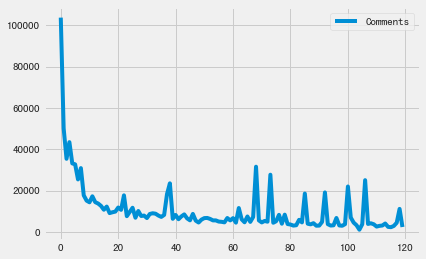

In [218]:
#story1:跟据销量排名（x轴）和评论数（y轴）得知，产品销量基本和评论数成正相关，但其中存在7个不符合规律评论数过高的点，合理怀疑有刷评论行为。
df['Comments'].plot()
plt.legend()
plt.show()

Text(0.5, 1.0, 'country-comments')

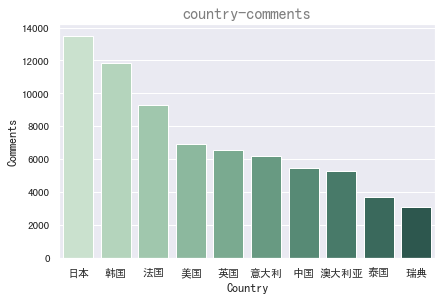

In [219]:
#story2:在所有美妆产品中，日本化妆品占评论数最高，韩国占第二。通过表格比较，得知双十一日本的产品销量增加最多。
sns.set(font='SimHei')
pd_df = df.groupby(['Country'])['Comments'].mean().reset_index().sort_values("Comments",ascending=False) #this is to solve the output chart is not sorted by likes.
ax = sns.barplot(x='Country', y='Comments',data=pd_df,palette=("ch:2.5,-.2,dark=.3")) #palette is like the color combination style
plt.title('country-comments', color='gray', fontsize=16, weight='bold')

Text(0.5, 1.0, 'country-comments')

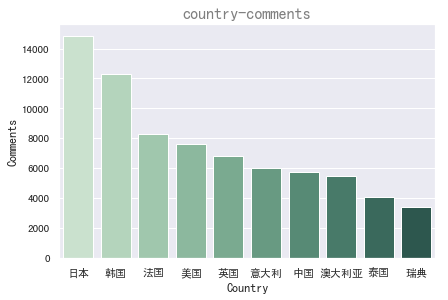

In [220]:
sns.set(font='SimHei')
pd_df = df2.groupby(['Country'])['Comments'].mean().reset_index().sort_values("Comments",ascending=False) #this is to solve the output chart is not sorted by likes.
ax = sns.barplot(x='Country', y='Comments',data=pd_df,palette=("ch:2.5,-.2,dark=.3")) #palette is like the color combination style
plt.title('country-comments', color='gray', fontsize=16, weight='bold')

In [221]:
#清洗“Price”数据，将其变为float
df['price']=df['Price'].str.strip('¥')
df2['price']=df2['Price'].str.strip('¥')
df['price']=df['price'].astype('float')
df2['price']=df2['price'].astype('float')
df.to_csv('kaola.csv')
df2.to_csv('kaola2.csv')

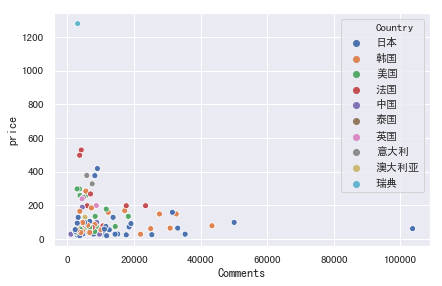

In [222]:
ax = sns.scatterplot(x="Comments", y="price",hue='Country',data=df)

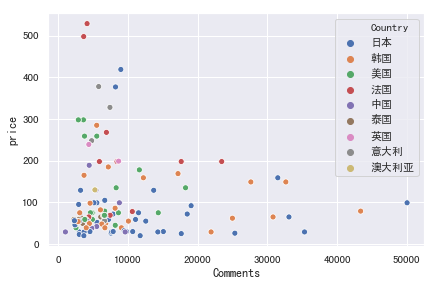

In [223]:
#story3:除去极端点，结合平均价格可得知日本和韩国为低价获胜，其产品价格大多小于200，中日泰韩等亚裔地区的口碑化妆品价格普遍低于欧洲的化妆品
dfno=df.drop([0, 112])
ax = sns.scatterplot(x="Comments", y="price",hue='Country',data=dfno)

In [224]:
group1 = df.groupby('Country')
group1['price'].agg('mean')

Country
中国        76.237500
意大利      252.500000
日本        74.502326
法国       229.900000
泰国        59.416667
澳大利亚     130.000000
瑞典      1280.000000
美国       127.055556
英国       219.000000
韩国        90.555556
Name: price, dtype: float64